# Coffee Market Analysis
## Exploratory Data Analysis Notebook

### Matthew Garton - February 2019

**Purpose:** The purpose of this notebook is to perform Exploratory Data Analysis on my coffee dataset, to examine relationships between variables, distributions, and try to determine which variables will be most useful for predicting coffee prices. 

**Context**: The ultimate goal of my project is to develop trading signals for coffee futures. I will attempt to build a machine learning model which uses fundamental and technical data to predict the future direction of coffee futures price changes. My expectation at the outset of this project is that my feature matrix will include data on weather, GDP, and coffee production and exports in major coffee-producing nations, GDP and coffee import data in major coffee-importing nations, as well as volume, open-interest, and commitment of traders data for ICE coffee futures contracts.

This notebook imports a cleaner dataset that I prepared in the Data Wrangling Notebook, called CoffeeDataset. See '../data/' for all of the raw data that I started with, or the links in the Data Wrangling Notebook to get the data directly from the source.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset
coffee = pd.read_csv('../data/CoffeeDataset.csv')
coffee['Date'] = pd.to_datetime(coffee['Date'])
coffee.set_index('Date', inplace=True)

In [3]:
coffee.head()

,Open,High,Low,Settle,Volume,BRA_Temp,BRA_Precip,COL_Precip,COL_Temp,ETH_Precip,ETH_Temp,IDN_Precip,IDN_Temp,VNM_Precip,VNM_Temp,Production,Consumption (domestic),Exportable Production,Gross Opening Stocks,Exports,Imports,Re-exports,Inventories,Disappearance,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,NonComm_Postions_Spread_All,Comm_Positions_Long_All,Comm_Positions_Short_All,Tot_Rept_Positions_Long_All,Tot_Rept_Positions_Short_All,NonRept_Positions_Long_All,NonRept_Positions_Short_All,Pct_of_OI_NonComm_Long_All,Pct_of_OI_NonComm_Short_All,Pct_of_OI_NonComm_Spread_All,Pct_of_OI_Comm_Long_All,Pct_of_OI_Comm_Short_All,Pct_of_OI_Tot_Rept_Long_All,Pct_of_OI_Tot_Rept_Short_All,Pct_of_OI_NonRept_Long_All,Pct_of_OI_NonRept_Short_All,Conc_Gross_LE_4_TDR_Long_All,Conc_Gross_LE_4_TDR_Short_All,Conc_Gross_LE_8_TDR_Long_All,Conc_Gross_LE_8_TDR_Short_All,Conc_Net_LE_4_TDR_Long_All,Conc_Net_LE_4_TDR_Short_All,Conc_Net_LE_8_TDR_Long_All,Conc_Net_LE_8_TDR_Short_All
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-01-03,72.50,73.35,71.45,72.50,5844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,71.85,72.70,71.30,71.85,7048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,71.55,73.10,71.40,71.55,6608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-06,72.10,72.20,70.55,72.10,6710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,72.50,72.70,70.65,72.50,9432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#coffee.fillna(method='pad', inplace=True) # Fill NaNs with last observation carried forward
#coffee.dropna(inplace=True); # Drop remaining NaN values - cases where there's no prior observation to carry forward

In [5]:
def get_forward_returns(df, ranges):
    for r in ranges:
        df['{}D_Return'.format(r)] = df['Open'].pct_change(r).shift(-r)

In [6]:
ranges = [5, 10, 20]
get_forward_returns(coffee, ranges)

In [7]:
def get_historical_vol(df, ranges):
    for r in ranges:
        df['{}D_Vol'.format(r)] = df['Open'].rolling(r).std()

In [8]:
ranges = [20, 60, 120]
get_historical_vol(coffee, ranges)

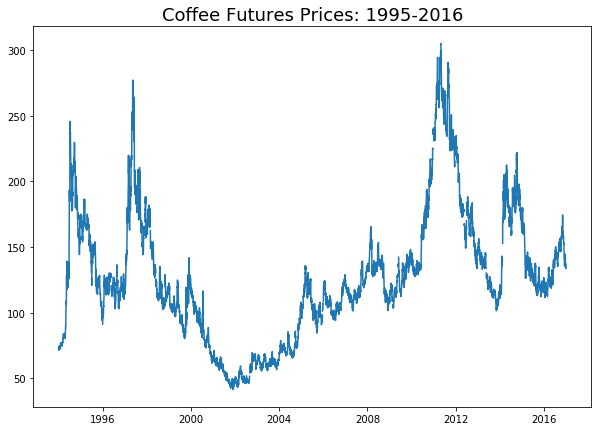

In [9]:
# first, take a look at full price history
plt.figure(figsize=(10,7))
plt.plot(coffee['Settle'])
plt.title('Coffee Futures Prices: 1995-2016', fontsize=18);

In [10]:
def plot_price_and_var(df, var):
    fig = plt.figure(figsize = (12, 5))
    ax1 = fig.add_subplot(111)
    ax1.plot(df['Settle'].dropna(), color='k', label='Price')

    ax2 = ax1.twinx()
    ax2.plot(df[var].dropna(),color='g', label=var)

    plt.title('Price and {}'.format(var), fontsize=18)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2);

In [11]:
def plot_vol_and_var(df, var):
    fig = plt.figure(figsize = (12, 5))
    ax1 = fig.add_subplot(111)
    ax1.plot(df['20D_Vol'].dropna(), color='k', label='Vol')

    ax2 = ax1.twinx()
    ax2.plot(df[var].dropna(),color='g', label=var)

    plt.title('Vol and {}'.format(var), fontsize=18)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2);

In [12]:
def plot_returns_and_var(df, var):
    fig = plt.figure(figsize = (12, 5))
    ax1 = fig.add_subplot(111)
    ax1.plot(df['20D_Return'].dropna(), color='k', label='Price')

    ax2 = ax1.twinx()
    ax2.plot(df[var].dropna(),color='g', label=var)

    plt.title('Return and {}'.format(var), fontsize=18)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2);

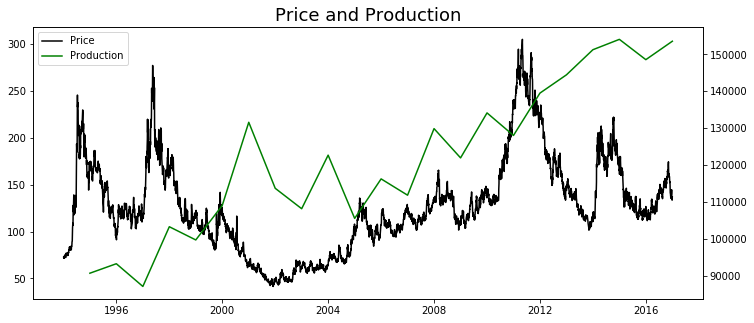

In [13]:
plot_price_and_var(coffee, 'Production')

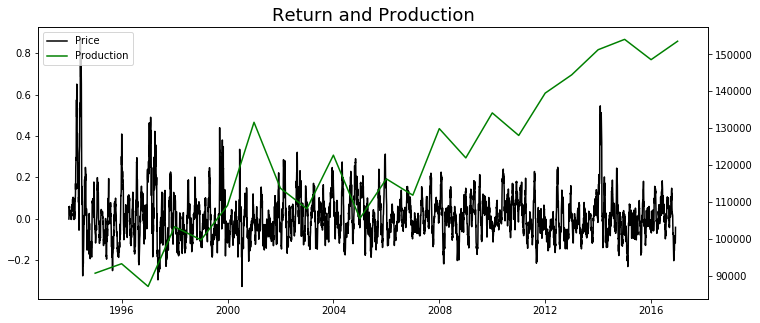

In [14]:
plot_returns_and_var(coffee, 'Production')

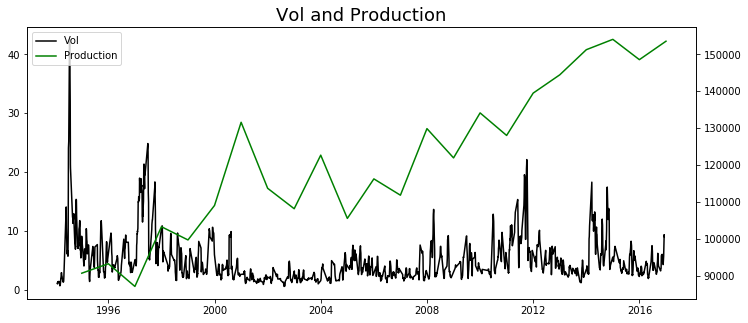

In [13]:
plot_vol_and_var(coffee, 'Production')

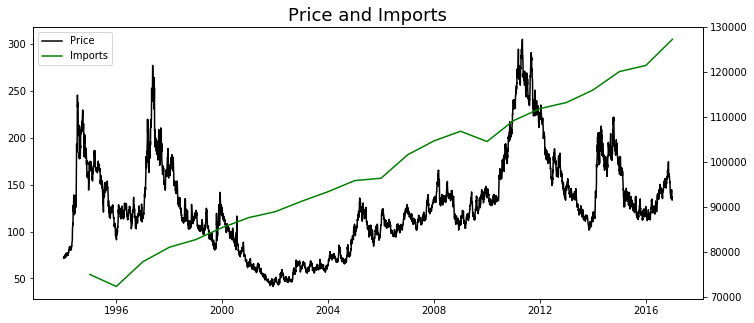

In [14]:
plot_price_and_var(coffee, 'Imports')

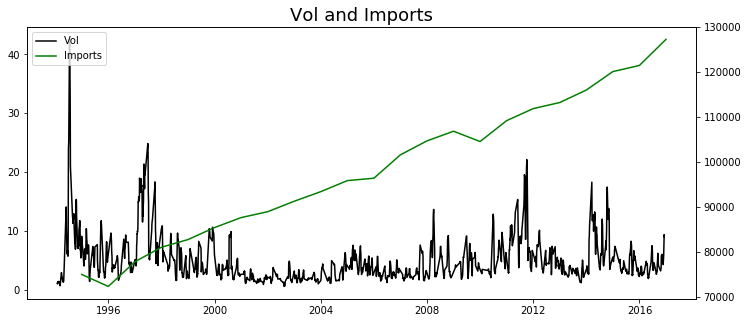

In [15]:
plot_vol_and_var(coffee, 'Imports')

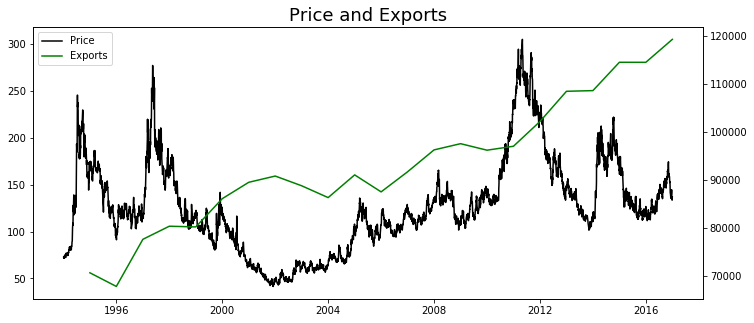

In [16]:
plot_price_and_var(coffee, 'Exports')

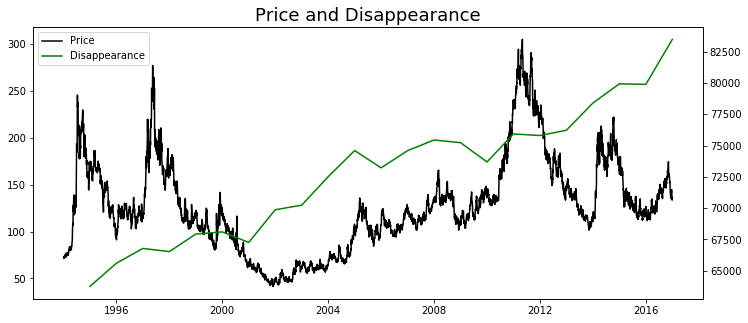

In [17]:
plot_price_and_var(coffee, 'Disappearance')

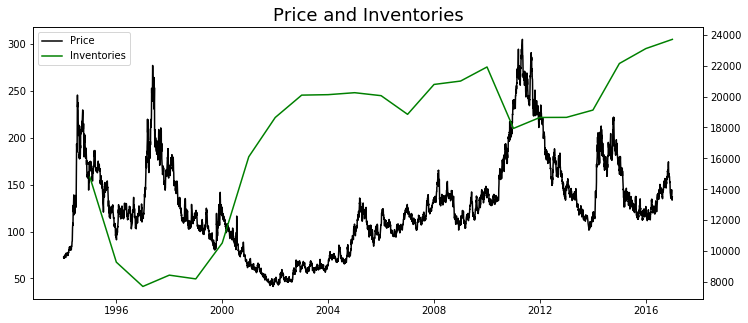

In [18]:
plot_price_and_var(coffee, 'Inventories')

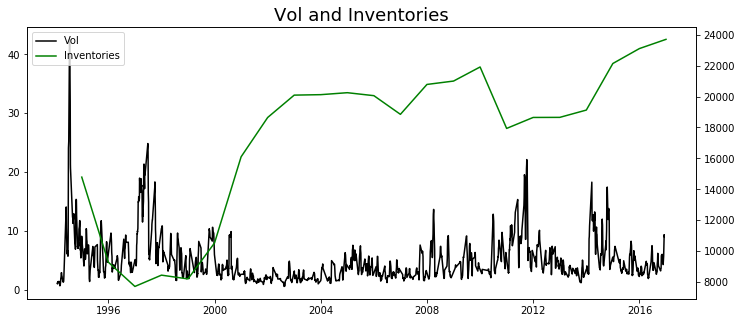

In [19]:
plot_vol_and_var(coffee, 'Inventories')

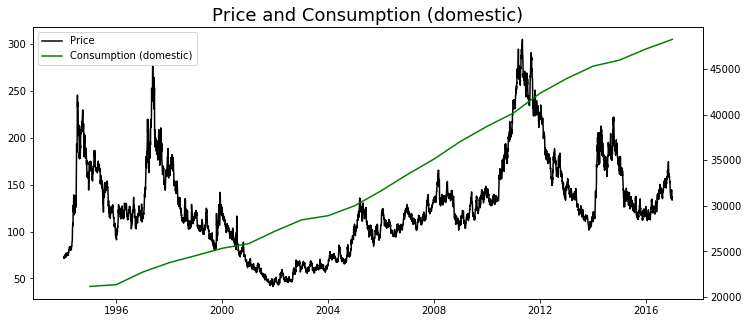

In [20]:
plot_price_and_var(coffee, 'Consumption (domestic)')

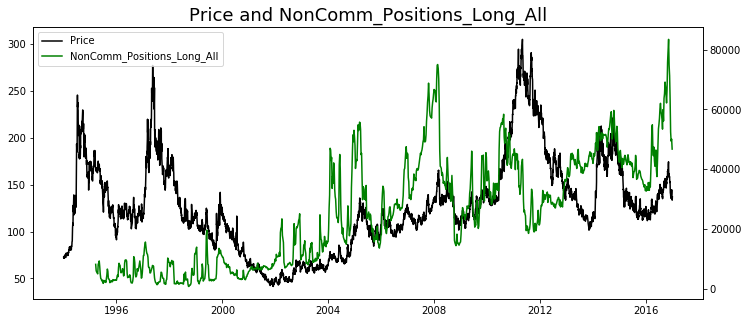

In [21]:
plot_price_and_var(coffee, 'NonComm_Positions_Long_All')

In [22]:
coffee['Chg_Inventories'] = coffee['Inventories'].dropna().pct_change()

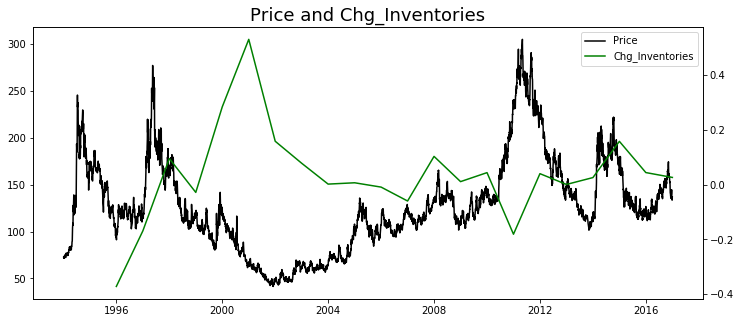

In [23]:
plot_price_and_var(coffee, 'Chg_Inventories')

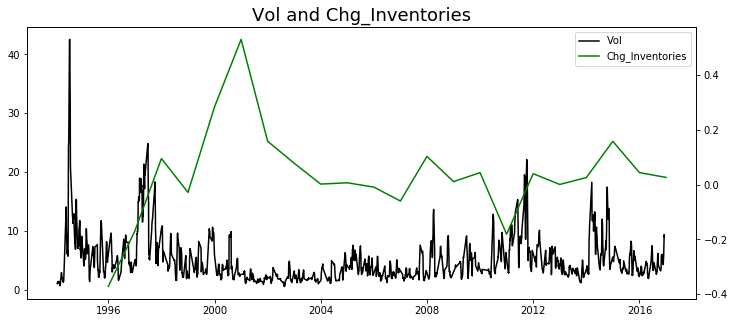

In [24]:
plot_vol_and_var(coffee, 'Chg_Inventories')

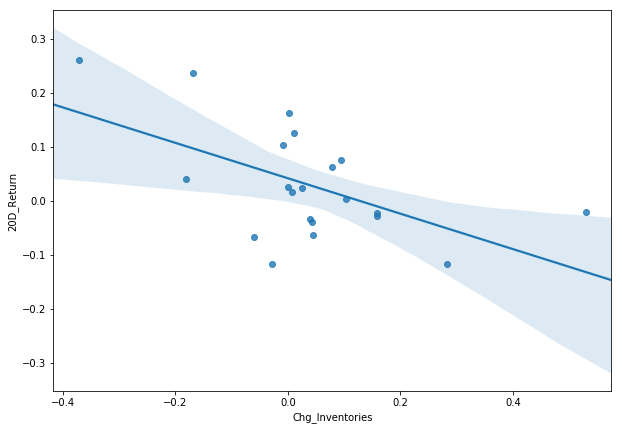

In [35]:
plt.figure(figsize=(10,7))
sns.regplot(x=coffee['Chg_Inventories'], y=coffee['20D_Return']);

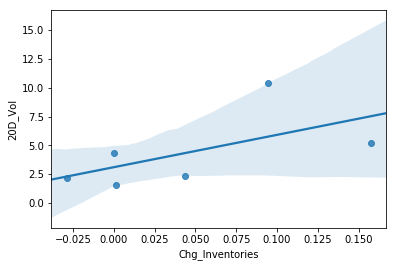

In [36]:
sns.regplot(x=coffee['Chg_Inventories'], y=coffee['20D_Vol']);

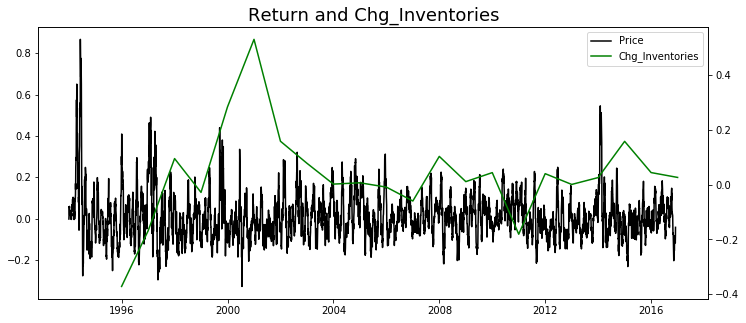

In [34]:
plot_returns_and_var(coffee, 'Chg_Inventories')

### Note on further data needed

Exchange rate data for key exporters: https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data?keyword=exchange%20rate

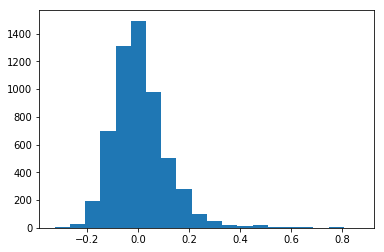

In [28]:
plt.hist(coffee['20D_Return'], bins=20);

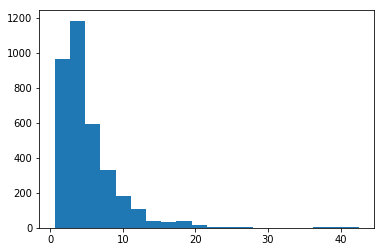

In [29]:
plt.hist(coffee['20D_Vol'], bins=20);

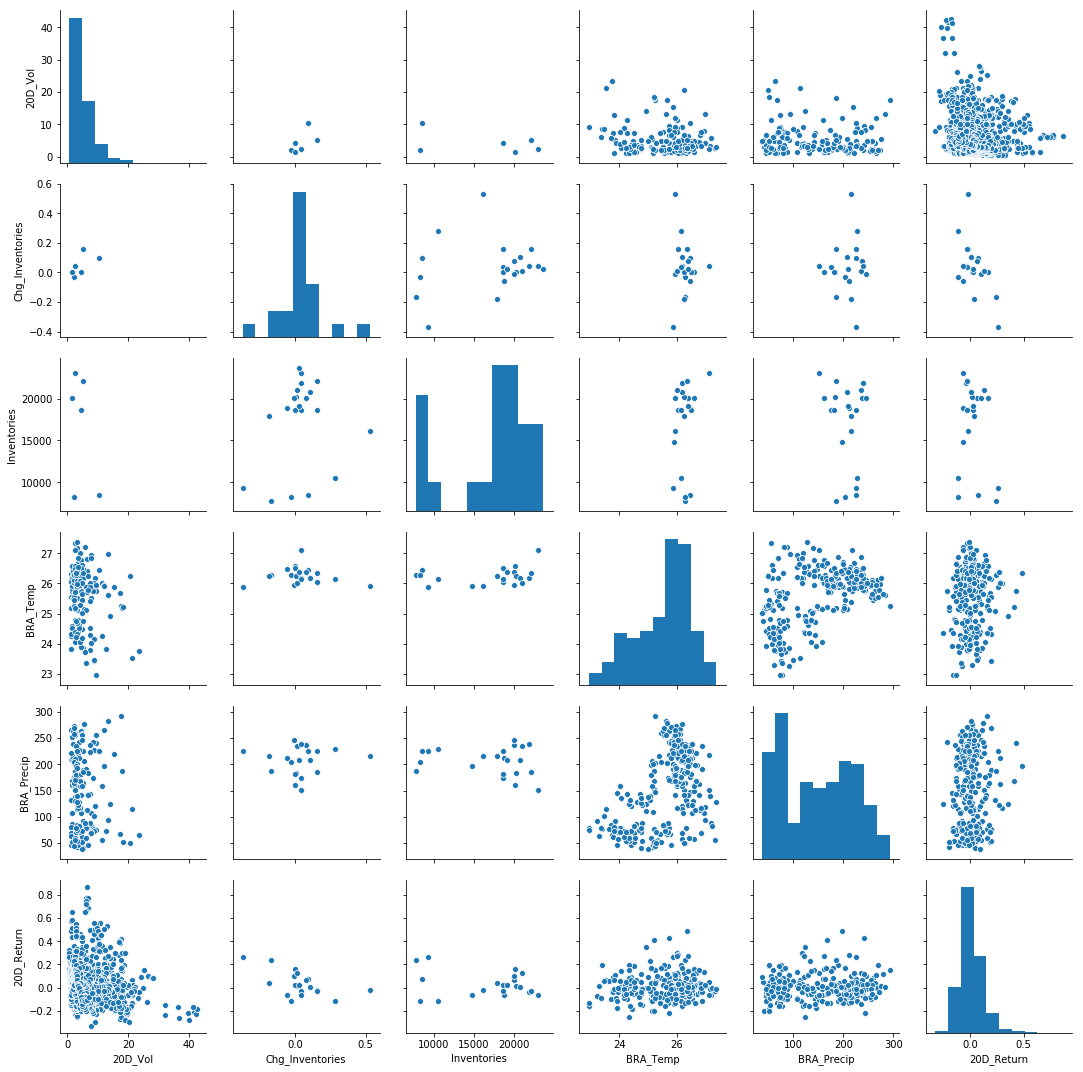

In [42]:
sns.pairplot(data=coffee, 
             vars=['20D_Vol', 'Chg_Inventories', 'Inventories', 'BRA_Temp','BRA_Precip', '20D_Return'])

In [43]:
lt_ranges = [90, 120, 250]
get_forward_returns(coffee, lt_ranges)

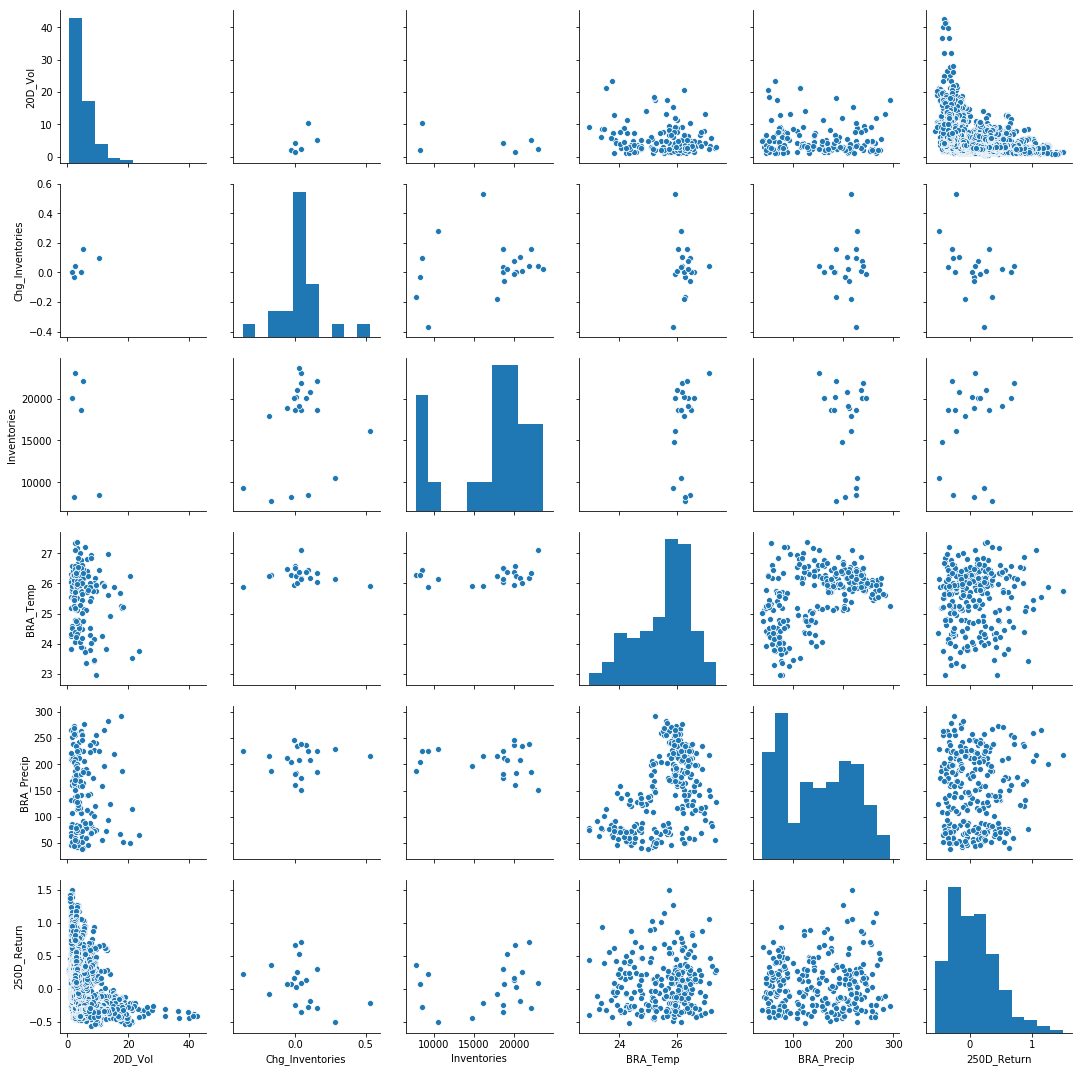

In [46]:
sns.pairplot(data=coffee, 
             vars=['20D_Vol', 'Chg_Inventories', 'Inventories', 'BRA_Temp','BRA_Precip', '250D_Return'])